In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
dataframe = pd.read_csv("forestfires.csv")
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
print("Head:", dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
dataframe.drop('monthaug',axis='columns', inplace=True)
dataframe.drop('monthdec',axis='columns', inplace=True)
dataframe.drop('monthfeb',axis='columns', inplace=True)
dataframe.drop('monthjan',axis='columns', inplace=True)
dataframe.drop('monthjul',axis='columns', inplace=True)
dataframe.drop('monthjun',axis='columns', inplace=True)
dataframe.drop('monthmar',axis='columns', inplace=True)
dataframe.drop('monthmay',axis='columns', inplace=True)
dataframe.drop('monthnov',axis='columns', inplace=True)
dataframe.drop('monthoct',axis='columns', inplace=True)
dataframe.drop('monthsep',axis='columns', inplace=True)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
dataframe.drop('daysat',axis='columns', inplace=True)
dataframe.drop('daysun',axis='columns', inplace=True)
dataframe.drop('daythu',axis='columns', inplace=True)
dataframe.drop('daytue',axis='columns', inplace=True)
dataframe.drop('daywed',axis='columns', inplace=True)
dataframe.drop('monthapr',axis='columns', inplace=True)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(5), object(1)
memory usage: 56.7+ KB


In [8]:
print("Head:", dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon size_category  
0       0         small  
1       0         small  
2       0         small  
3       0         small  
4       0         small  


In [9]:
df=pd.get_dummies(dataframe,columns=['size_category'], drop_first=True)

In [10]:
print(df.head())

   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  size_category_small  
0       0                    1  
1       0                    1  
2       0                    1  
3       0                    1  
4       0                    1  


In [11]:
print("Shape:", dataframe.shape)

Shape: (517, 14)


<AxesSubplot:xlabel='month'>

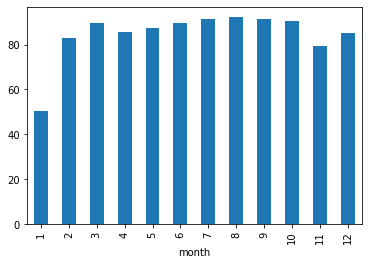

In [12]:
dataframe.groupby('month').FFMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='day'>

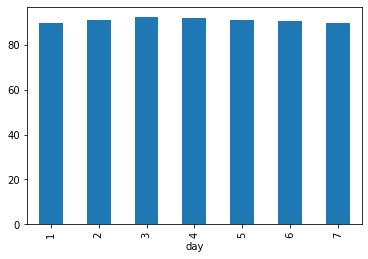

In [13]:
dataframe.groupby('day').FFMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

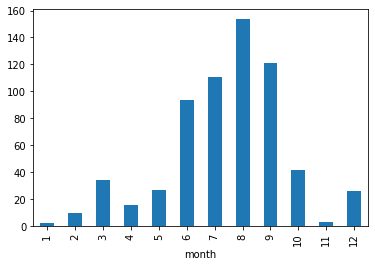

In [14]:
dataframe.groupby('month').DMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

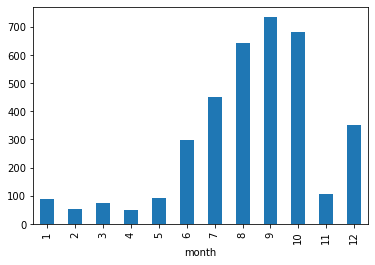

In [15]:
dataframe.groupby('month').DC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

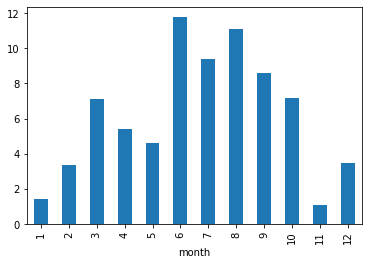

In [16]:
dataframe.groupby('month').ISI.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

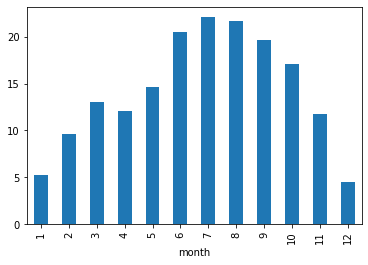

In [17]:
dataframe.groupby('month').temp.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

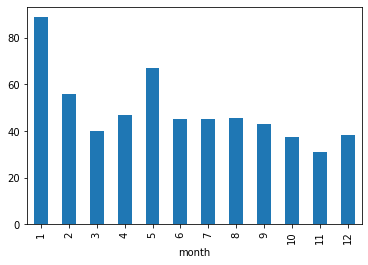

In [18]:
dataframe.groupby('month').RH.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

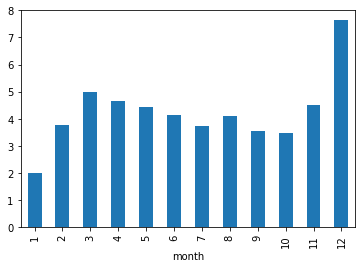

In [19]:
dataframe.groupby('month').wind.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

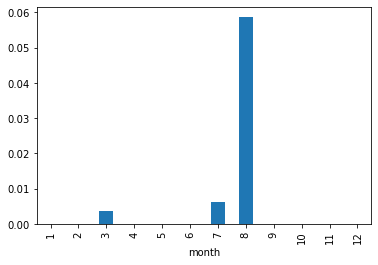

In [20]:
dataframe.groupby('month').rain.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

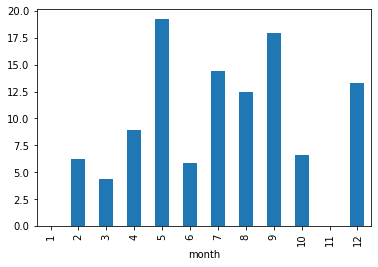

In [21]:
dataframe.groupby('month').area.mean().plot(kind='bar')

In [22]:
from sklearn.model_selection import train_test_split
X = dataframe[['FFMC', 'DMC']]
Y = dataframe['month']
X_train, a_test, Y_train, b_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(a_test, b_test)
print(score)

0.6442307692307693


In [26]:
co=dataframe.corr()
co

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,-0.028562,-0.002941
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,0.158676,-0.643220
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,-0.059396
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,-0.107921
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,-0.052993
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,-0.158601
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,-0.136529
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,0.009376
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,-0.063881
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,-0.029945


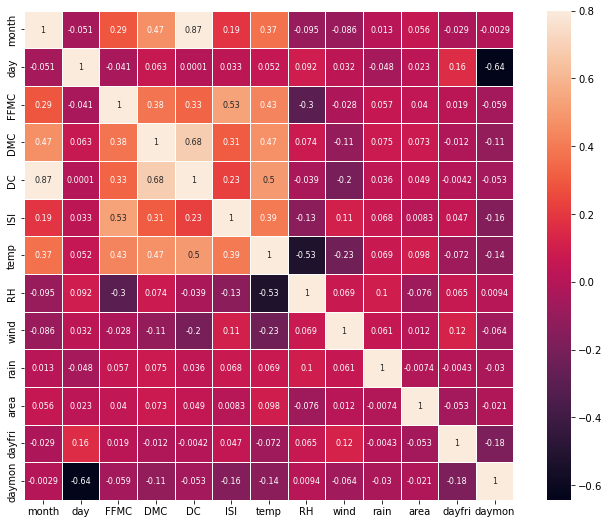

In [27]:
import seaborn as sns
import matplotlib.pyplot as pplt
corrmat = dataframe.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, annot_kws={"size": 8}, linewidths=.5);

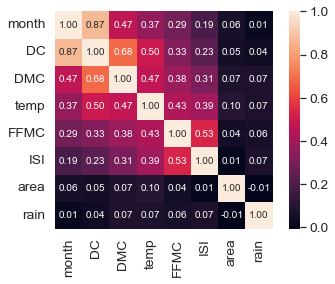

In [29]:
k = 8
cols = corrmat.nlargest(k, 'month')['month'].index
cm = np.corrcoef(dataframe[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [31]:
X = dataframe[['DC', 'ISI']]
Y = dataframe['month']
X_train, a_test, Y_train, b_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.8173076923076923


In [33]:
X = dataframe[['FFMC', 'DMC', 'DC', 'temp']]
Y = dataframe['month']
X_train, a_test, Y_train, b_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [34]:
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(a_test, b_test) 
print(score)

0.7980769230769231


<AxesSubplot:xlabel='day'>

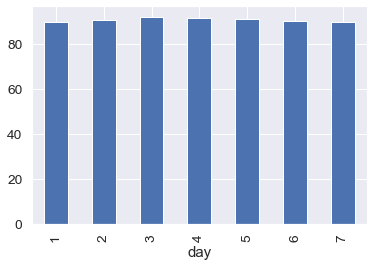

In [35]:
dataframe.groupby('day').FFMC.mean().plot(kind='bar')